# Exctracting frames


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,110 kB/s)
debconf: unable to initi

In [ ]:
!pip install pytesseract
# !pip install -U Pillow

!pip install Pillow==7.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 5.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytesseract 0.3.10 requires Pillow>=8.0.0, but you have pillow 7.1.2 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/DigitalGap/train.csv')
data.shape
data['comb'] = data['employee'].astype(str) + '/' + data['action'].astype(str)



In [ ]:

date_train = data['date'].values
print(len(data))

3519


In [ ]:
import os
dir_path = r'/content/gdrive/MyDrive/DigitalGap/validation'

already_exctracted = []

for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        already_exctracted.append(path.split('.')[0])
print(len(already_exctracted))

new_data = data[data.id.isin(list(map(int, already_exctracted))) == False]
print(len(new_data))

date_train = new_data['date'].values
print(new_data['id'].values)


0
3519
[1256 1257 1258 ... 4772 4773 4774]


In [ ]:
import shutil
import random 


random.shuffle(already_exctracted)
cnt = 0
for im in already_exctracted:
  if cnt == 792:
    break
  try:
    shutil.move(f'/content/gdrive/MyDrive/DigitalGap/validation/{im}.jpg', '/content/gdrive/MyDrive/DigitalGap/tr1_train') 
    cnt += 1

  except Exception:
    continue


In [ ]:
import pytesseract
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

WHITE = [255,255,255]
vidcap = cv2.VideoCapture('/content/gdrive/MyDrive/DigitalGap/train2.avi')
frameNr = 15
extracted_date = []
extracted_id = []

while (2):
  success,image = vidcap.read()
  if frameNr % 15 == 0:
    if success:
      frame_re = image[50:200, 0:800]
      # (thresh, blackAndWhite60) = cv2.threshold(frame_re, 20, 255, cv2.THRESH_BINARY)

      # constant60= cv2.copyMakeBorder(blackAndWhite60,20,20,20,20,cv2.BORDER_CONSTANT,value=WHITE)

      extractedInformation60 = pytesseract.image_to_string(frame_re)
      
      date60 = extractedInformation60[1:10].replace('-','/').strip()

      time60 = extractedInformation60[15:23].strip()

      full_date60 = date60 + " " + time60

      if not(full_date60 in extracted_date) and (full_date60 in date_train):
        print(time60)
        extracted_date.append(full_date60)
        id = data.loc[data['date'] == full_date60]['id'].values[0]
        cv2.imwrite(f'/content/gdrive/MyDrive/DigitalGap/tr1_train/{id}.jpg' , image)
        extracted_id.append(id)
      frameNr += 1
    else:
      break
  else:
    frameNr += 1
    continue

with open('res.txt', 'w') as fp:
    for item in extracted_date:
        fp.write("%s\n" % item)

files.download( "res.txt" ) 



11:14:48
11:48:12
11:52:28
13:22:08
13:26:48
14:50:38


# Новый раздел

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)


In [12]:
train_images = []       
train_labels = []
shape = (331,331)  
train_path = '/content/gdrive/MyDrive/DigitalGap/tr1_train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        id = filename.split('.')[0]
        label = data[data['id']==int(id)]['employee'].values[0]
        train_labels.append(label)
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

print(train_labels)
# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

ValueError: ignored

[0 0 0 0 0 1 0 0 0 0 0]


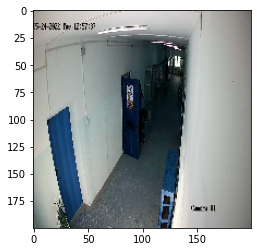

In [ ]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

In [23]:
import tensorflow as tf

base_model = tf.keras.applications.EfficientNetV2B3(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(331,331,3)
                     )

base_model.trainable=False

model = Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(11, activation='softmax')
    ])
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )
# Model Summary
model.summary()

52617216/52606240 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b3 (Function  (None, 11, 11, 1536)     12930622  
 al)                                                             
                                                                 
 batch_normalization (BatchN  (None, 11, 11, 1536)     10752     
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dense_1 (Dense)             (None, 128)               32

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=25,validation_data=(x_val,y_val))

Epoch 1/50
106/106 [==============================] - 693s 6s/step - loss: 2.0610 - acc: 0.2483 - val_loss: 1.8289 - val_acc: 0.3178
Epoch 2/50
106/106 [==============================] - 686s 6s/step - loss: 1.7882 - acc: 0.3637 - val_loss: 1.6916 - val_acc: 0.3656
Epoch 3/50
106/106 [==============================] - 677s 6s/step - loss: 1.6650 - acc: 0.4070 - val_loss: 1.5706 - val_acc: 0.4021
Epoch 4/50
106/106 [==============================] - 673s 6s/step - loss: 1.5485 - acc: 0.4408 - val_loss: 1.4753 - val_acc: 0.4487
Epoch 5/50
106/106 [==============================] - 673s 6s/step - loss: 1.4700 - acc: 0.4730 - val_loss: 1.4283 - val_acc: 0.4499
Epoch 6/50
106/106 [==============================] - 672s 6s/step - loss: 1.3858 - acc: 0.5019 - val_loss: 1.4044 - val_acc: 0.4579
Epoch 7/50
106/106 [==============================] - 672s 6s/step - loss: 1.3453 - acc: 0.5015 - val_loss: 1.3849 - val_acc: 0.4522
Epoch 8/50
106/106 [==============================] - 672s 6s/step - 

In [ ]:
model.save('best_model.h5')

In [ ]:
from google.colab import files
files.download( "best_model.h5" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
from tensorflow.keras.models import load_model


test_images = []       
test_id = []
shape = (331,331)  
test_path = '/content/gdrive/MyDrive/DigitalGap/test'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        id = filename.split('.')[0]
        test_id.append(int(id))
        img = cv2.resize(img,shape)
        test_images.append(img)


test_id.sort()
print(test_id)

model_emp = load_model('/content/gdrive/MyDrive/DigitalGap/91emp.h5')
model_act = load_model('/content/gdrive/MyDrive/DigitalGap/86act.h5')
y_test_emp = []
y_test_act = []
for img in range(len(test_images)):
  y_pred_employee = model_emp.predict(test_images[img].reshape(1,331, 331, 3))
  y_pred_action = model_act.predict(test_images[img].reshape(1,331, 331, 3))
  pred_emp = np.argmax(y_pred_employee)
  pred_act = np.argmax(y_pred_action)
  print(pred_emp, pred_act)
  y_test_emp.append(pred_emp)
  y_test_act.append(pred_act)

data_test = pd.read_csv('/content/gdrive/MyDrive/DigitalGap/test.csv')

data_test['employee'] = y_test_emp
data_test['action'] = y_test_act


[135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334,

,id,date,employee,action
0,135,5/22/2022 11:51:06,2,4
1,136,5/22/2022 11:51:25,2,4
2,137,5/22/2022 12:04:27,4,4
3,138,5/22/2022 12:07:56,0,4
4,139,5/22/2022 12:08:10,2,4
...,...,...,...,...
1116,1251,5/24/2022 07:57:00,3,2
1117,1252,5/24/2022 07:57:32,3,2
1118,1253,5/24/2022 07:57:34,3,2
1119,1254,5/24/2022 07:57:39,9,14


In [10]:
from google.colab import files
data_test.to_csv('prediction.csv', encoding = 'utf-8-sig') 
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>